<a href="https://www.kaggle.com/code/pragyamukherjee/crime-knn?scriptVersionId=111950336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("../input/sfcrime/train.csv/train.csv")
dataset

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [3]:
train_data = dataset[["DayOfWeek", "PdDistrict",'X', 'Y', 'Category']]

train_data

,DayOfWeek,PdDistrict,X,Y,Category
0,Wednesday,NORTHERN,-122.425892,37.774599,WARRANTS
1,Wednesday,NORTHERN,-122.425892,37.774599,OTHER OFFENSES
2,Wednesday,NORTHERN,-122.424363,37.800414,OTHER OFFENSES
3,Wednesday,NORTHERN,-122.426995,37.800873,LARCENY/THEFT
4,Wednesday,PARK,-122.438738,37.771541,LARCENY/THEFT
...,...,...,...,...,...
878044,Monday,TARAVAL,-122.459033,37.714056,ROBBERY
878045,Monday,INGLESIDE,-122.447364,37.731948,LARCENY/THEFT
878046,Monday,SOUTHERN,-122.403390,37.780266,LARCENY/THEFT
878047,Monday,SOUTHERN,-122.390531,37.780607,VANDALISM


In [4]:
train_data.head(10)

,DayOfWeek,PdDistrict,X,Y,Category
0,Wednesday,NORTHERN,-122.425892,37.774599,WARRANTS
1,Wednesday,NORTHERN,-122.425892,37.774599,OTHER OFFENSES
2,Wednesday,NORTHERN,-122.424363,37.800414,OTHER OFFENSES
3,Wednesday,NORTHERN,-122.426995,37.800873,LARCENY/THEFT
4,Wednesday,PARK,-122.438738,37.771541,LARCENY/THEFT
5,Wednesday,INGLESIDE,-122.403252,37.713431,LARCENY/THEFT
6,Wednesday,INGLESIDE,-122.423327,37.725138,VEHICLE THEFT
7,Wednesday,BAYVIEW,-122.371274,37.727564,VEHICLE THEFT
8,Wednesday,RICHMOND,-122.508194,37.776601,LARCENY/THEFT
9,Wednesday,CENTRAL,-122.419088,37.807802,LARCENY/THEFT


In [5]:
from sklearn.preprocessing import LabelEncoder
train_data["Category"] = train_data["Category"].to_frame()
le = LabelEncoder()
train_data["Category"] = le.fit_transform(train_data["Category"])
data_week_dict = {
    "Monday": 1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
train_data["DayOfWeek"] = train_data["DayOfWeek"].replace(data_week_dict)
#District
district = train_data["PdDistrict"].unique()
data_dict_district = {}
count = 1
for data in district:
    data_dict_district[data] = count
    count+=1 
train_data["PdDistrict"] = train_data["PdDistrict"].replace(data_dict_district)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [6]:
train_data

,DayOfWeek,PdDistrict,X,Y,Category
0,3,1,-122.425892,37.774599,37
1,3,1,-122.425892,37.774599,21
2,3,1,-122.424363,37.800414,21
3,3,1,-122.426995,37.800873,16
4,3,2,-122.438738,37.771541,16
...,...,...,...,...,...
878044,1,7,-122.459033,37.714056,25
878045,1,3,-122.447364,37.731948,16
878046,1,10,-122.403390,37.780266,16
878047,1,10,-122.390531,37.780607,35


In [7]:
train_data.corr()

,DayOfWeek,PdDistrict,X,Y,Category
DayOfWeek,1.000000,-0.001995,0.005999,-0.000908,0.001078
PdDistrict,-0.001995,1.000000,0.181772,0.006265,-0.032026
X,0.005999,0.181772,1.000000,0.559338,-0.024401
Y,-0.000908,0.006265,0.559338,1.000000,-0.000414
Category,0.001078,-0.032026,-0.024401,-0.000414,1.000000


In [8]:
train_data.shape

(878049, 5)

In [9]:
train_data.isnull().sum()

DayOfWeek     0
PdDistrict    0
X             0
Y             0
Category      0
dtype: int64

In [10]:
train_data.describe()

,DayOfWeek,PdDistrict,X,Y,Category
count,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
mean,3.992691,6.037957,-122.422616,37.771020,19.338687
std,1.972023,3.114945,0.030354,0.456893,10.688637
min,1.000000,1.000000,-122.513642,37.707879,0.000000
25%,2.000000,3.000000,-122.432952,37.752427,16.000000
50%,4.000000,6.000000,-122.416420,37.775421,20.000000
75%,6.000000,9.000000,-122.406959,37.784369,25.000000
max,7.000000,10.000000,-120.500000,90.000000,38.000000


In [11]:
train_data.isnull()

,DayOfWeek,PdDistrict,X,Y,Category
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
878044,False,False,False,False,False
878045,False,False,False,False,False
878046,False,False,False,False,False
878047,False,False,False,False,False


In [12]:
X = train_data.iloc[:,0:-1].values
X

array([[   3.        ,    1.        , -122.42589168,   37.7745986 ],
       [   3.        ,    1.        , -122.42589168,   37.7745986 ],
       [   3.        ,    1.        , -122.42436302,   37.80041432],
       ...,
       [   1.        ,   10.        , -122.40339036,   37.78026558],
       [   1.        ,   10.        , -122.3905314 ,   37.78060708],
       [   1.        ,    4.        , -122.39492572,   37.73821154]])

In [13]:
y = train_data.iloc[:,-1].values

In [14]:
train_data["Category"].unique()

array([37, 21, 16, 36, 35, 20, 25,  1, 38,  4, 32,  8, 12,  7, 30, 27, 34,
       19, 13, 15, 26,  6, 28, 23,  5,  0, 11, 17,  3,  9, 31, 18, 29, 10,
       14,  2, 33, 24, 22])

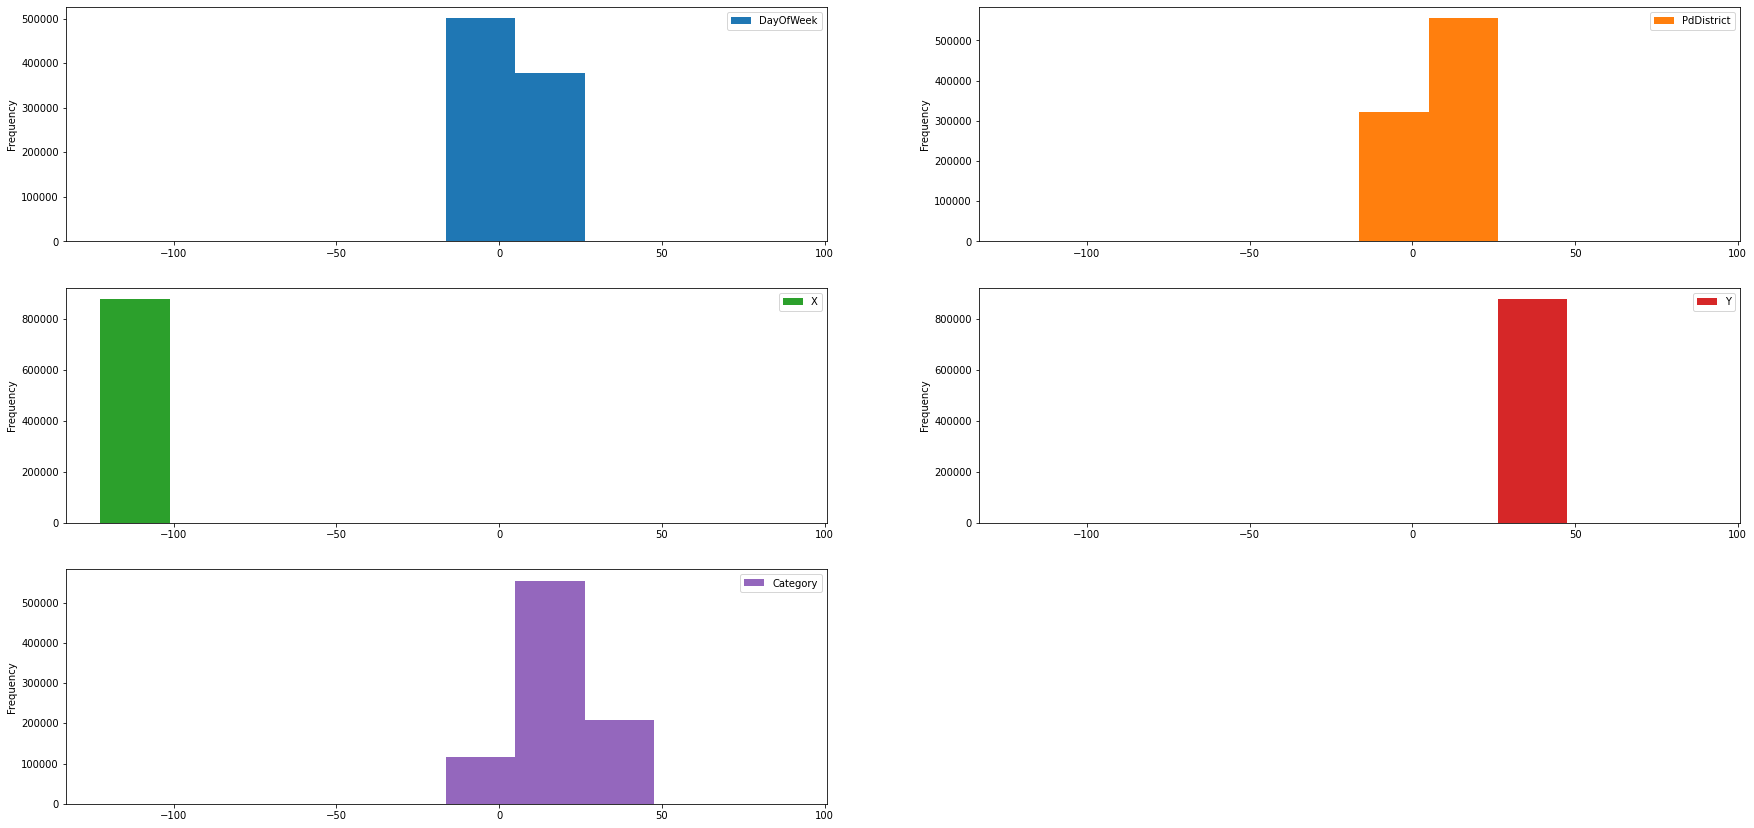

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(30,25)
train_data.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in range(1, 10, 1):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("K value : ", i, "accuracy : ", accuracy_score(y_test, y_pred, normalize=True))

K value :  1 accuracy :  0.18632153904324572
K value :  2 accuracy :  0.19413884371312862
K value :  3 accuracy :  0.20106781830688844
K value :  4 accuracy :  0.21143622473384263
K value :  5 accuracy :  0.22271118339232757
K value :  6 accuracy :  0.23064693207236017
K value :  7 accuracy :  0.23643702195314173
K value :  8 accuracy :  0.23962134361062898
K value :  9 accuracy :  0.24368032872768355


<AxesSubplot:>

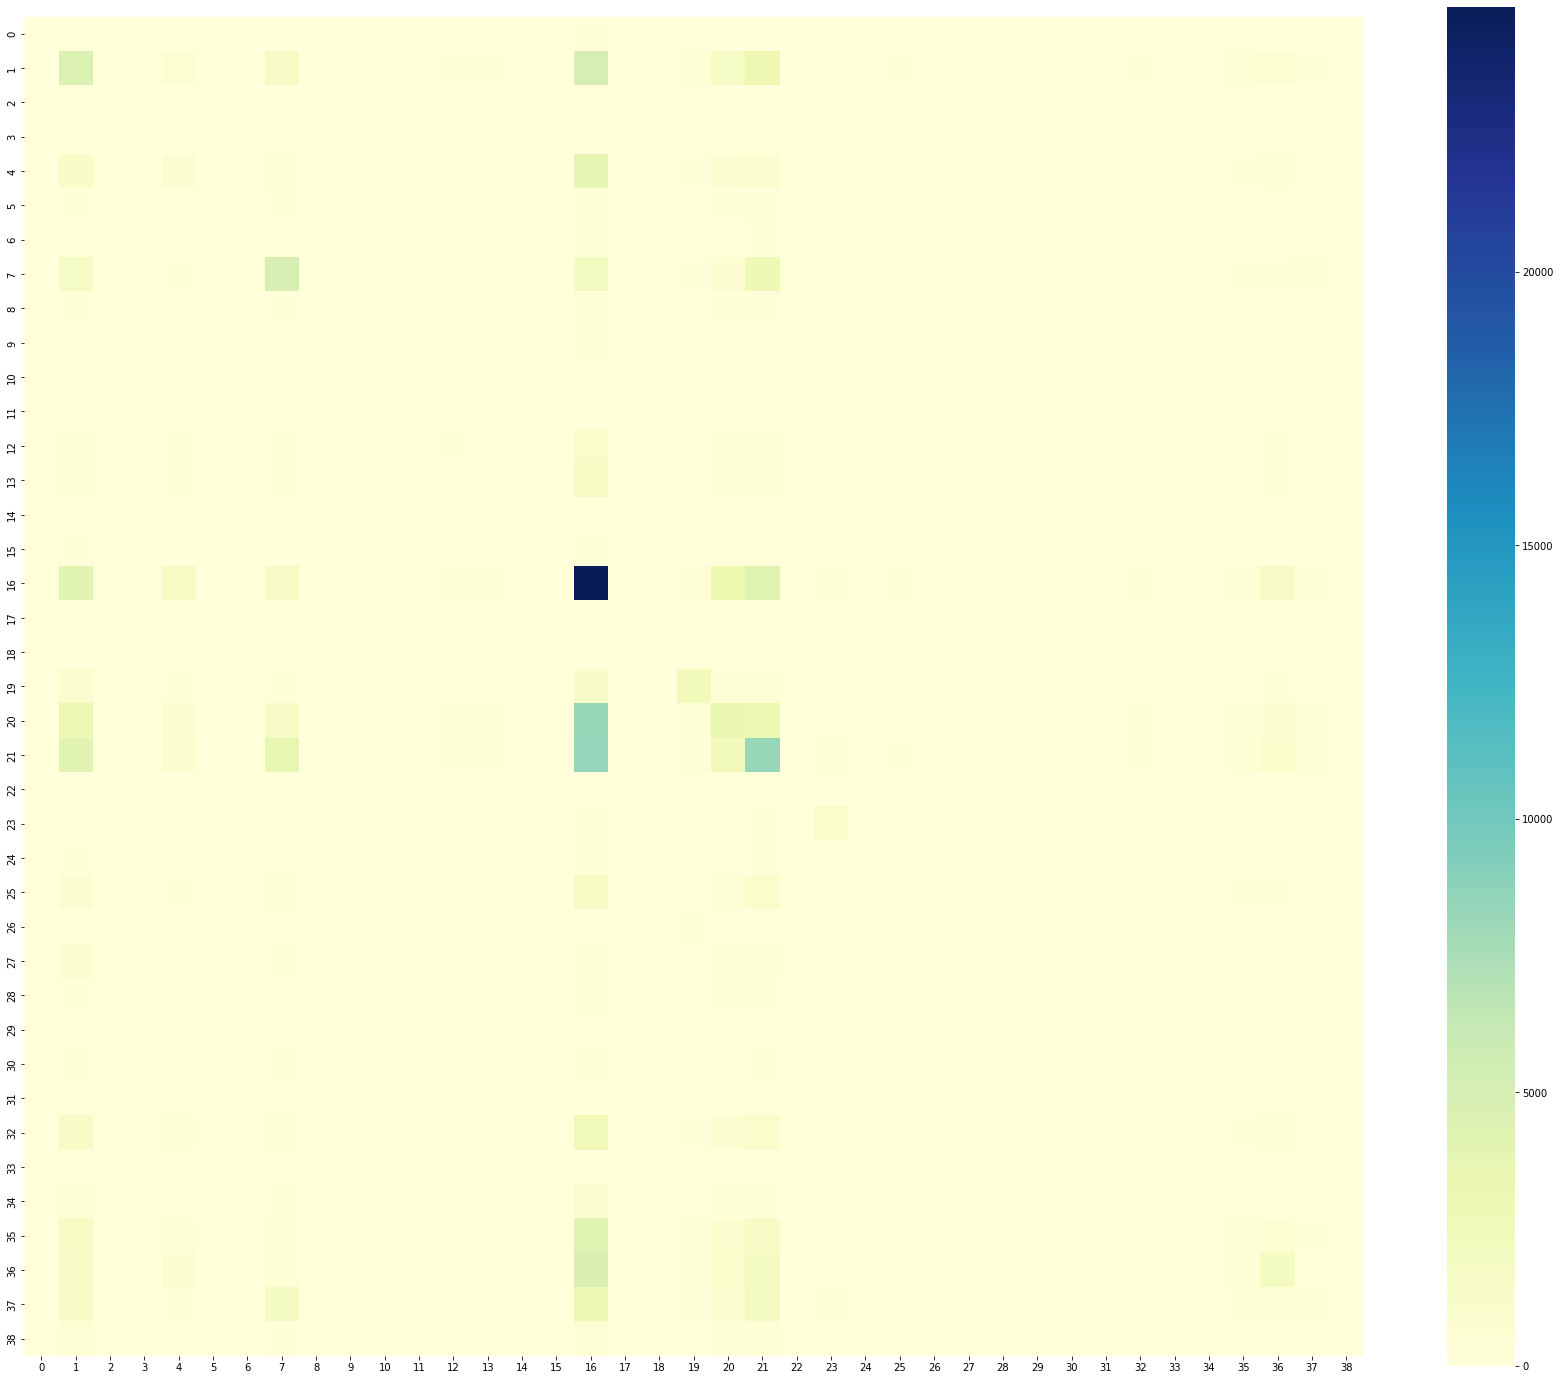

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns  
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
sns.heatmap(cm, cmap="YlGnBu", square=True)

In [19]:
print(classification_report(y_test, y_pred))  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.02      0.01      0.01       382
           1       0.15      0.24      0.18     19231
           2       0.00      0.00      0.00        89
           3       0.00      0.00      0.00        72
           4       0.11      0.09      0.10      9247
           5       0.06      0.03      0.04      1018
           6       0.03      0.01      0.01       585
           7       0.25      0.37      0.30     13457
           8       0.03      0.01      0.01      1076
           9       0.00      0.00      0.00       274
          10       0.00      0.00      0.00        58
          11       0.00      0.00      0.00       106
          12       0.11      0.06      0.08      2604
          13       0.06      0.02      0.03      4036
          14       0.00      0.00      0.00        43
          15       0.00      0.00      0.00       549
          16       0.32      0.57      0.41     43883
          17       0.09    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[   3   66    0 ...   26    3    2]
 [  26 4610    2 ...  613  237   45]
 [   0   12    0 ...    4    2    0]
 ...
 [  17 1601    0 ... 1858   89   17]
 [  10 1515    0 ...  214  270   20]
 [   3  470    2 ...   57   40   25]]
